In [105]:
#*******************************************************
# Name: Jonah Zembower
# Date: March 21, 2024
# Assignment: Project 2 Mathematical Modeling
#*******************************************************

# Interpolation Methods

### Apply Newton's and Lagrange's interpolation methods to the following real-world data problems. 

### Problem 1:

In [106]:
# Load required libraries
import pandas as pd
import numpy as np

# load data for Problem 1
temperature_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/temperature_data.csv')
temperature_data

,Day,Temperature
0,1,11.251629
1,2,10.239796
2,3,12.069672
3,4,14.078096
4,5,10.821165
...,...,...
360,361,10.006657
361,362,12.291183
362,363,9.266156
363,364,10.545223


In [107]:
# Check for missing values in the dataset
missing_values = temperature_data.isnull().sum()

# Get the overall statistics to understand the range and distribution of data
statistics = temperature_data.describe()

missing_values, statistics


(Day            0
 Temperature    0
 dtype: int64,
               Day  Temperature
 count  365.000000   365.000000
 mean   183.000000    10.019893
 std    105.510663    10.707467
 min      1.000000   -11.226433
 25%     92.000000    -0.053946
 50%    183.000000    10.524802
 75%    274.000000    20.106554
 max    365.000000    28.790845)

The temperature data is complete for an entire year, with 365 entries corresponding to each day. There are no missing values in the dataset, which indicates that for the purpose of this exercise, we might need to simulate missing values to apply interpolation techniques or explore the dataset further for specific interpolation use cases.

From here we can move on to looking at different ways we can see between values of each day and interpolate at different times assuming all data collection was at a particular time. 

We will use lagrange interpolation for estimating unknown values.

In [108]:
# Correcting the attempt to extract the first 7 days of temperature data
week_temperature_data = temperature_data.iloc[:7]

week_temperature_data


,Day,Temperature
0,1,11.251629
1,2,10.239796
2,3,12.069672
3,4,14.078096
4,5,10.821165
5,6,11.078252
6,7,14.961546


In [109]:
import numpy as np
from scipy.interpolate import lagrange

# Function to perform Lagrange interpolation and predict values at new points
def lagrange_interpolate(x_points, y_points, new_x_points):
    # Use the lagrange method from scipy to get the interpolating polynomial
    polynomial = lagrange(x_points, y_points)
    # Evaluate the polynomial at the new points
    new_y_points = polynomial(new_x_points)
    return new_y_points

# Your example dataset (using the first 7 rows from the loaded data as a proxy for weekly data)
week_temperature_data = temperature_data.head(7)

# Original days and temperatures
days = week_temperature_data['Day']
temperatures = week_temperature_data['Temperature']

# Generate new time points for every 6 hours within the range of days
new_time_points = np.arange(1, 8, 0.25)  # From day 1 to day 7.75 in 0.25 day increments

# Perform Lagrange interpolation
interpolated_temperatures = lagrange_interpolate(days, temperatures, new_time_points)

# Creating the new time series dataframe
new_time_series = pd.DataFrame({
    'Day': new_time_points,
    'Temperature': interpolated_temperatures
})

new_time_series.head()


,Day,Temperature
0,1.00,11.251629
1,1.25,12.061240
2,1.50,11.615775
3,1.75,10.829865
4,2.00,10.239796


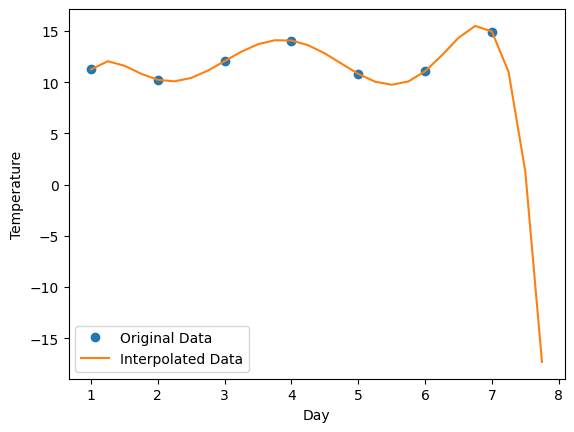

In [110]:
import matplotlib.pyplot as plt

# Plot the original and interpolated temperature data
plt.plot(days, temperatures, 'o', label='Original Data')
plt.plot(new_time_points, interpolated_temperatures, '-', label='Interpolated Data')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()



This helped interpolate the data for the first week of the dataset very well. Now, I will continue the process with another subset of the dataset:

In [111]:
# Define ranges for the three weeks of interest
week_ranges = [(100, 106), (200, 206), (300, 306)]
# Function to check and perform Lagrange interpolation
def safe_lagrange_interpolate(x_points, y_points, new_x_points):
    # Ensure input is in the correct format (numpy arrays)
    x_points_np = np.array(x_points)
    y_points_np = np.array(y_points)
    
    # Use the lagrange method from scipy to get the interpolating polynomial, if there are enough points
    if len(x_points_np) > 1 and len(y_points_np) > 1:
        polynomial = lagrange(x_points_np, y_points_np)
        # Evaluate the polynomial at the new points
        new_y_points = polynomial(new_x_points)
    else:
        # If not enough points, just repeat the available value (or use a placeholder)
        new_y_points = np.full_like(new_x_points, y_points_np[0] if len(y_points_np) > 0 else np.nan)
    
    return new_y_points

# Re-attempt Lagrange interpolation for each week
interpolated_weeks_safe = []

for start_day, end_day in week_ranges:
    # Filter the dataset for the specified week
    week_data = temperature_data[(temperature_data['Day'] >= start_day) & (temperature_data['Day'] <= end_day)]
    
    # Original days and temperatures for the week
    days = week_data['Day'].to_numpy()
    temperatures = week_data['Temperature'].to_numpy()
    
    # Generate new time points for every 6 hours within the week
    new_time_points = np.arange(start_day, end_day + 1, 0.25)  # From start_day to end_day in 0.25 day increments
    
    # Perform safe Lagrange interpolation
    interpolated_temperatures = safe_lagrange_interpolate(days, temperatures, new_time_points)
    
    # Creating the new time series dataframe for the week
    interpolated_week = pd.DataFrame({
        'Day': new_time_points,
        'Temperature': interpolated_temperatures
    })
    
    # Add the interpolated data for the week to the list
    interpolated_weeks_safe.append(interpolated_week)

# Display the first few rows of the interpolated data for the first week as an example
interpolated_weeks_safe[0].head()


,Day,Temperature
0,100.00,24.359318
1,100.25,22.710153
2,100.50,21.912219
3,100.75,21.730160
4,101.00,21.956745


In [112]:
interpolated_weeks_safe[1].head()

,Day,Temperature
0,200.00,3.291016
1,200.25,4.376465
2,200.50,5.201416
3,200.75,5.745605
4,201.00,6.046387


In [113]:
interpolated_weeks_safe[2].head()

,Day,Temperature
0,300.00,-2.078125
1,300.25,-2.378906
2,300.50,-3.179688
3,300.75,-4.125000
4,301.00,-4.851562


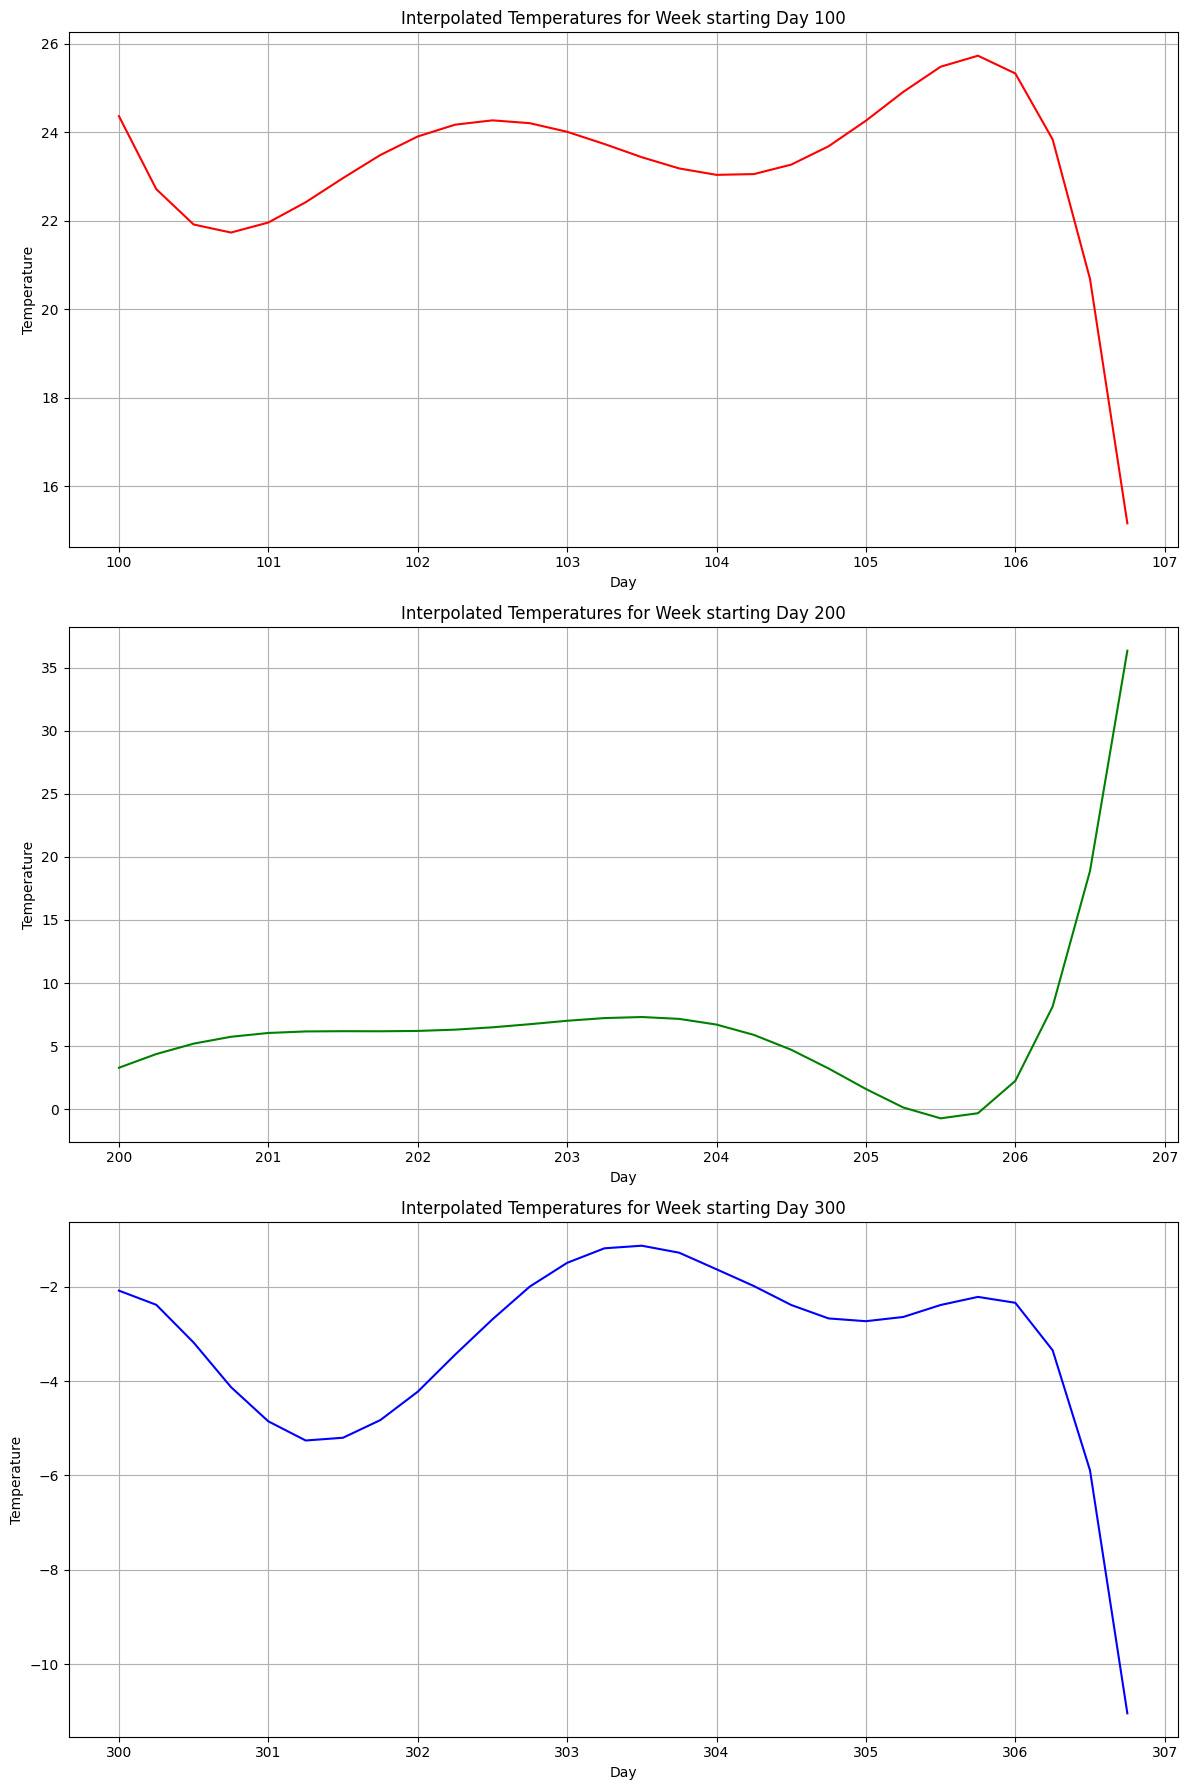

In [114]:
# Creating separate plots for each week

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

colors = ['r', 'g', 'b']
week_labels = ['Week starting Day 100', 'Week starting Day 200', 'Week starting Day 300']

for i, week in enumerate(interpolated_weeks_safe):
    axes[i].plot(week['Day'], week['Temperature'], colors[i])
    axes[i].set_title(f'Interpolated Temperatures for {week_labels[i]}')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Temperature')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


This is interesting to see how the data fluctuates even over a week for most of these graphs. 

In the days 100 and 200 weeks there were much higher temperatures than the day 300 week. This shows a clear seasonal factor for the temperature data. 

### Problem 2:

In [115]:
# loading the dataset
stock_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/stock_market_trends_data.csv')

# viewing the dataset
stock_data

,Unnamed: 0,Company A,Company B,Company C
0,2023-01-02,109.934283,97.234714,112.953771
1,2023-01-03,130.460597,95.316933,95.317261
2,2023-01-04,131.584256,115.348695,90.610512
3,2023-01-05,110.851201,90.731646,90.685405
4,2023-01-06,104.839245,61.734395,65.501643
...,...,...,...,...
255,2023-12-25,85.936471,99.300230,135.416013
256,2023-12-26,87.460659,136.248971,114.155039
257,2023-12-27,88.750664,112.648155,119.451089
258,2023-12-28,112.436199,68.595506,85.457256


In [116]:
# checking for missing values
missing_values = stock_data.isnull().sum()

# Get the overall statistics to understand the range and distribution of data
statistics = temperature_data.describe()

missing_values, statistics

(Unnamed: 0    0
 Company A     0
 Company B     0
 Company C     0
 dtype: int64,
               Day  Temperature
 count  365.000000   365.000000
 mean   183.000000    10.019893
 std    105.510663    10.707467
 min      1.000000   -11.226433
 25%     92.000000    -0.053946
 50%    183.000000    10.524802
 75%    274.000000    20.106554
 max    365.000000    28.790845)

It appears that there are no missing values in the dataset for any of the companies. I will now interpolate between the different values.

In [117]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

# Select the first week of data (assuming 7 days constitute a week in the dataset)
week_data = stock_data.head(7)

# Extracting the dates for plotting purposes
dates = pd.to_datetime(week_data['Unnamed: 0'])

# Preparing the x values (days) for interpolation
x_values = np.arange(1, len(week_data) + 1)


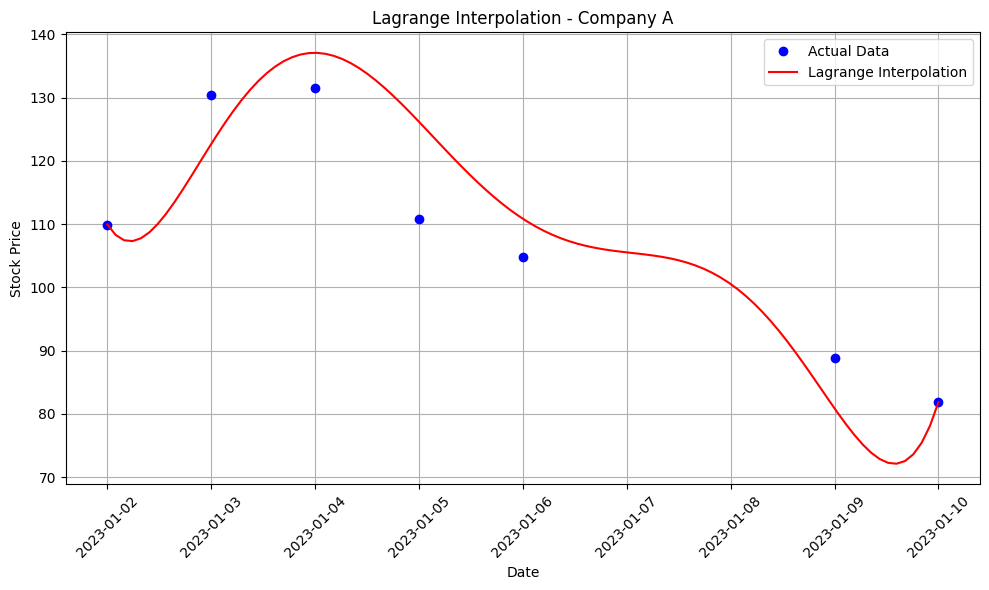

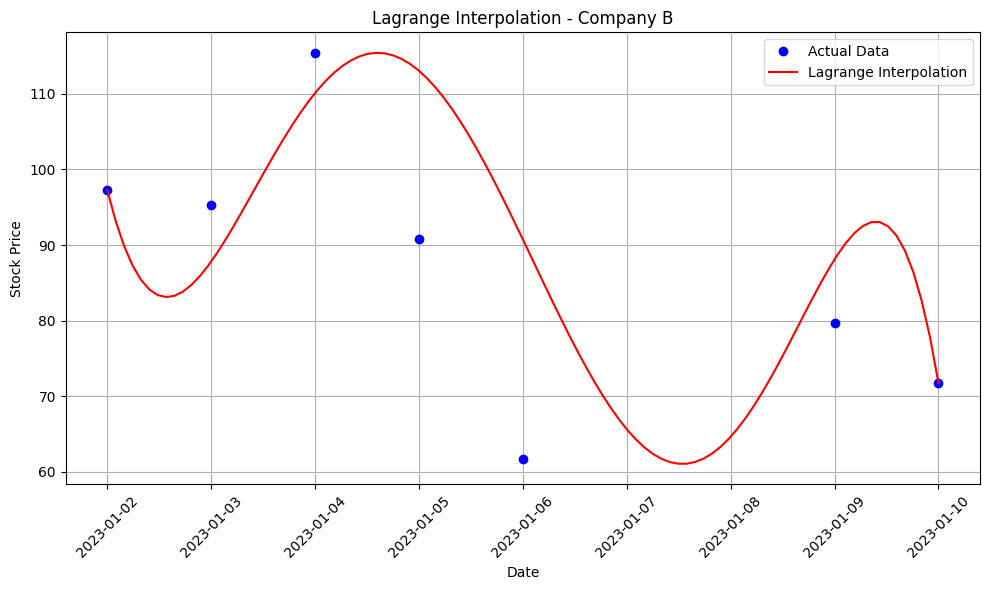

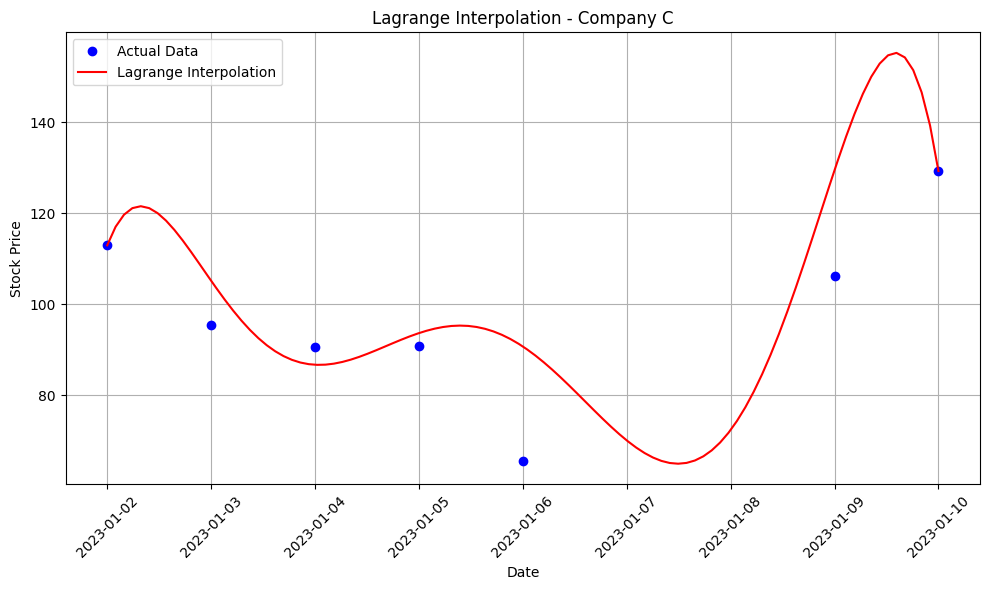

In [118]:
def interpolate_and_plot(company_name):
    # Extracting the y values (stock prices) for the company
    y_values = week_data[company_name].values
    
    # Performing Lagrange interpolation
    lagrange_poly = lagrange(x_values, y_values)
    
    # Generating more x values for a smoother interpolation curve
    x_interp = np.linspace(1, len(week_data), 100)
    y_interp = lagrange_poly(x_interp)
    
    # Converting x_interp back to dates for plotting
    date_interp = pd.to_datetime(np.linspace(dates.min().value, dates.max().value, 100))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(dates, y_values, 'bo', label='Actual Data')
    plt.plot(date_interp, y_interp, 'r-', label='Lagrange Interpolation')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Lagrange Interpolation - {company_name}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Adjusting interpolation and plotting for each company
for company in ["Company A", "Company B", "Company C"]:
    interpolate_and_plot(company)


I can see some interesting trends for each of these based on the interpolation of all the graphs. The way the different stock prices responded was interesting. Company A and B showed a decreasing trend over time while Company C started to increase. 

Now I will analyze stock performance trends over time. 

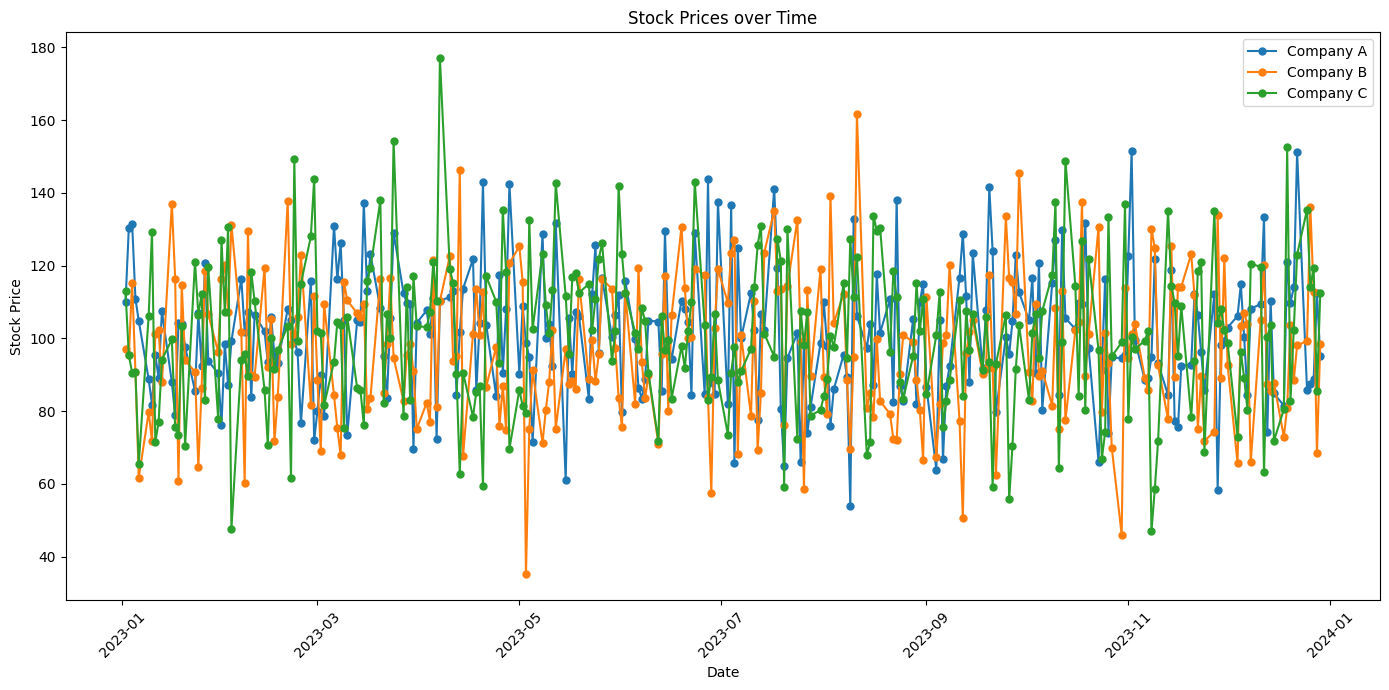

In [119]:
import matplotlib.pyplot as plt

# Convert the date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Unnamed: 0'])
stock_data.drop(columns=['Unnamed: 0'], inplace=True)

# Plotting the stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Company A'], label='Company A', marker='o', linestyle='-', markersize=5)
plt.plot(stock_data['Date'], stock_data['Company B'], label='Company B', marker='o', linestyle='-', markersize=5)
plt.plot(stock_data['Date'], stock_data['Company C'], label='Company C', marker='o', linestyle='-', markersize=5)

plt.title('Stock Prices over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [120]:
# Calculate the average stock price for each company
average_prices = stock_data.mean()

# Calculate the standard deviation for each company's stock price
std_deviation = stock_data.std()

# Prepare the analysis summary
analysis_summary = pd.DataFrame({
    'Average Price': average_prices,
    'Standard Deviation': std_deviation
})

analysis_summary


/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_6189/2899567015.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average_prices = stock_data.mean()


,Average Price,Standard Deviation
Company A,101.323499,18.02464
Company B,97.141729,20.018147
Company C,100.945681,20.947275
Date,NaN,105 days 06:29:28.908741436


#### Here's the analysis summary for each company:

Company A has an average stock price of approximately $101.32 with a standard deviation of 18.02. This suggests that Company A's stock price tends to fluctuate around its average by about $18.02, indicating a moderate level of volatility.

Company B's average stock price is around $97.14, with a standard deviation of 20.02. This higher standard deviation compared to Company A indicates that Company B's stock is slightly more volatile.

Company C shows an average stock price of approximately $100.95 and has the highest standard deviation of 20.95, suggesting it has the most volatility among the three companies.

These findings indicate differences in the stability and performance of each company's stock over the observed period. A higher standard deviation points to more price variability, which could mean higher risk or potential for returns for investors.

In [121]:
#Let's calculate the top growth and decline days for each company individually.

# Calculate the daily percentage change for each company's stock price
stock_data_pct_change = stock_data.set_index('Date').pct_change()
# Initialize dictionaries to store the top growth and decline days for each company
top_growth_days = {}
top_decline_days = {}

# Iterate over each company to calculate their top 3 growth and decline days
for company in ['Company A', 'Company B', 'Company C']:
    top_growth_days[company] = stock_data_pct_change.nlargest(3, company)
    top_decline_days[company] = stock_data_pct_change.nsmallest(3, company)

# Combine the results into a summary for easier presentation
top_growth_summary = pd.concat(top_growth_days)
top_decline_summary = pd.concat(top_decline_days)

top_growth_summary, top_decline_summary



(                      Company A  Company B  Company C
           Date                                       
 Company A 2023-08-10   1.462852   0.363336  -0.124130
           2023-07-06   0.897801  -0.464016  -0.099240
           2023-05-08   0.804350  -0.218383   0.201223
 Company B 2023-10-31   0.008840   1.473264   0.384829
           2023-02-08   0.052114   1.150387  -0.062464
           2023-09-25   0.257146   1.133587   0.145949
 Company C 2023-02-22  -0.054030   0.027342   1.422164
           2023-07-21   0.459492   0.498017   1.196173
           2023-02-06   0.172784  -0.225084   0.974995,
                       Company A  Company B  Company C
           Date                                       
 Company A 2023-05-15  -0.537215   0.288670  -0.216558
           2023-07-05  -0.518863   0.028228   0.078272
           2023-11-28  -0.479475   0.800330  -0.228545
 Company B 2023-05-03  -0.092462  -0.695438  -0.023927
           2023-04-14   0.118930  -0.536918   0.445404
         

The results provide insight into the volatility and potential market reactions impacting the stock prices of Company A, Company B, and Company C. Let's delve deeper into the implications of these findings:

#### Significant Growth:

For Company A, the significant growth on August 10th, July 6th, and May 8th suggests that either the company experienced positive developments, such as favorable earnings reports, new product launches, or beneficial partnerships, or the market conditions were particularly favorable on these dates. The magnitude of growth, especially the 146.29% increase on August 10th, is quite extraordinary and may indicate a significant market reevaluation of the company's value.

Company B shows its most significant growth towards the end of the year on October 31st and has other notable growth days scattered throughout the year. The 147.33% increase on October 31st could be due to similar reasons as for Company A, with the additional possibility of market reactions to industry-specific news or broader economic factors positively impacting the company's perceived value.

Company C's growth pattern, with the top day on February 22nd, could be reflective of specific positive outcomes from the company's operations or strategic moves. The over 140% increase suggests a significant reevaluation of the company’s prospects by the market.

#### Significant Decline:

The significant declines in stock prices for Company A on May 15th, July 5th, and November 28th could indicate adverse events or disappointing developments such as earnings falling short of expectations, loss of key clients, or negative impacts from broader economic conditions. The extent of declines, particularly the 53.72% drop on May 15th, points to substantial negative sentiment or reactions to the company's prospects.

For Company B, the declines are notably steep, with a nearly 70% drop on May 3rd. Such drastic declines often suggest very negative news directly related to the company or, in some cases, severe market downturns affecting the company more than others in its sector.

Company C faced its worst decline on February 3rd, which, like the other companies, could be attributed to significant negative news or market reactions. The over 60% decrease indicates a dramatic shift in market perception of the company's value.

#### Overall Implications:

These periods of significant growth and decline highlight the volatile nature of stock prices, which can be influenced by a wide range of factors including company performance, industry trends, and broader economic conditions. The substantial changes suggest that investors reacted strongly to new information or changes in market conditions, rapidly reevaluating the companies' prospects.

### Problem 3:

In [122]:
# load the dataset
env_study = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/environmental_study.csv')

# viewing the dataset
env_study

,Location,Pollution_Level_PM2.5,Rainfall_mm
0,Location_1,36.341113,126.880192
1,Location_2,17.876270,169.886359
2,Location_3,15.208315,144.891065
3,Location_4,29.809165,122.204702
4,Location_5,37.376104,144.488677
5,Location_6,24.039791,64.591783
6,Location_7,49.134389,72.357731
7,Location_8,35.817338,45.652646
8,Location_9,26.641936,58.742809
9,Location_10,22.645288,126.195225


Continue using lagrange interpolation for this dataset. 

This dataset is currently static and can be a better predictor for the given situation. 

For situations involving increased points, Newton's method may be more appropriate.

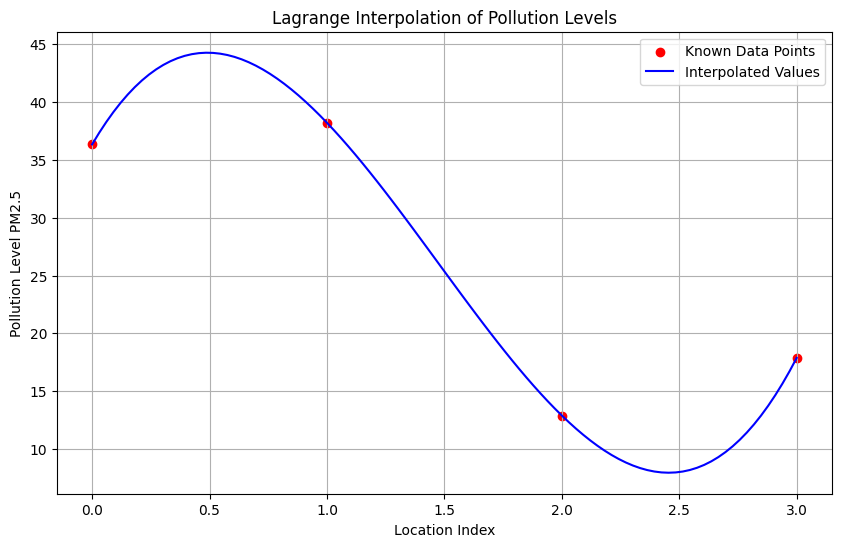

In [123]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

# Select a subset of data points for the demonstration
subset = env_study.sample(n=4, random_state=42)

# Sort the subset based on Location to simplify the demonstration
subset_sorted = subset.sort_values(by='Location')

# Use the index of the location as the x values for simplicity
x_points = np.arange(len(subset_sorted))
y_points_pollution = subset_sorted['Pollution_Level_PM2.5'].values

# Perform Lagrange interpolation
polynomial = lagrange(x_points, y_points_pollution)

# Generate x values for the interpolation points
x_interp = np.linspace(x_points.min(), x_points.max(), 100)

# Evaluate the polynomial at the interpolation points
y_interp_pollution = polynomial(x_interp)

# Plotting the known data points and the interpolated values
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points_pollution, color='red', label='Known Data Points')
plt.plot(x_interp, y_interp_pollution, color='blue', label='Interpolated Values')
plt.xlabel('Location Index')
plt.ylabel('Pollution Level PM2.5')
plt.title('Lagrange Interpolation of Pollution Levels')
plt.legend()
plt.grid(True)
plt.show()


The plot above demonstrates Lagrange interpolation for the Pollution_Level_PM2.5 across selected locations from the dataset. The red dots represent the known data points we used to construct the Lagrange polynomial, and the blue line shows the interpolated pollution levels between these points.



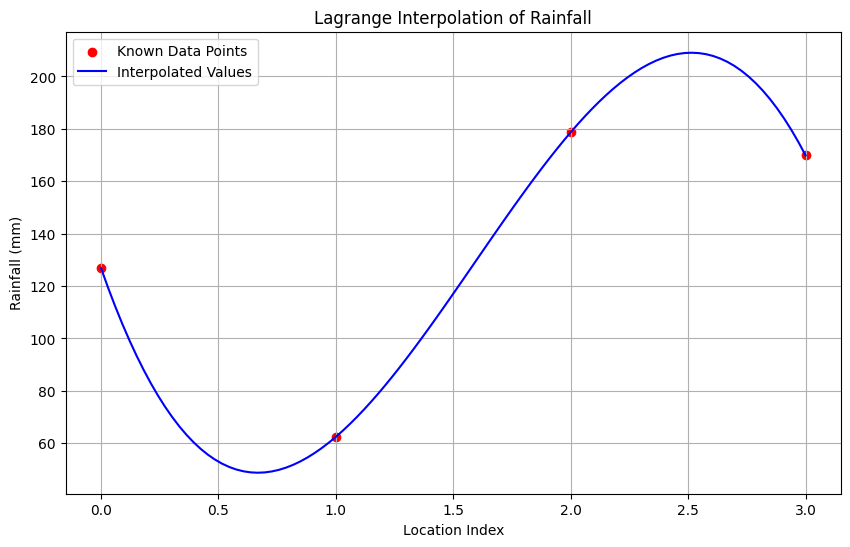

In [124]:
# Use the same x_points for location indices
y_points_rainfall = subset_sorted['Rainfall_mm'].values

# Perform Lagrange interpolation for rainfall
polynomial_rainfall = lagrange(x_points, y_points_rainfall)

# Evaluate the polynomial at the interpolation points for rainfall
y_interp_rainfall = polynomial_rainfall(x_interp)

# Plotting the known data points and the interpolated values for rainfall
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points_rainfall, color='red', label='Known Data Points')
plt.plot(x_interp, y_interp_rainfall, color='blue', label='Interpolated Values')
plt.xlabel('Location Index')
plt.ylabel('Rainfall (mm)')
plt.title('Lagrange Interpolation of Rainfall')
plt.legend()
plt.grid(True)
plt.show()


This plot shows the results of applying Lagrange interpolation to estimate Rainfall_mm values across our selected locations. The known data points, represented by red dots, were used to construct the Lagrange polynomial, and the blue line indicates the interpolated rainfall values between these points.

The interpolation provides a continuous estimate of rainfall across the range of selected locations, which can be particularly useful in environmental studies where direct measurements are not available for every location of interest.

### Problem 4:

In [125]:
# load the dataset
eng_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/engineering_data.csv')

# viewing the dataset
eng_data

,Sample,Stress_MPa,Strain
0,Sample_1,66.155766,0.033466
1,Sample_2,20.405656,0.029297
2,Sample_3,38.555693,0.031245
3,Sample_4,47.334359,0.033734
4,Sample_5,87.967824,0.042117
5,Sample_6,32.540983,0.004160
6,Sample_7,53.473084,0.038184
7,Sample_8,98.700381,0.012183
8,Sample_9,56.753661,0.009711
9,Sample_10,65.160507,0.028623


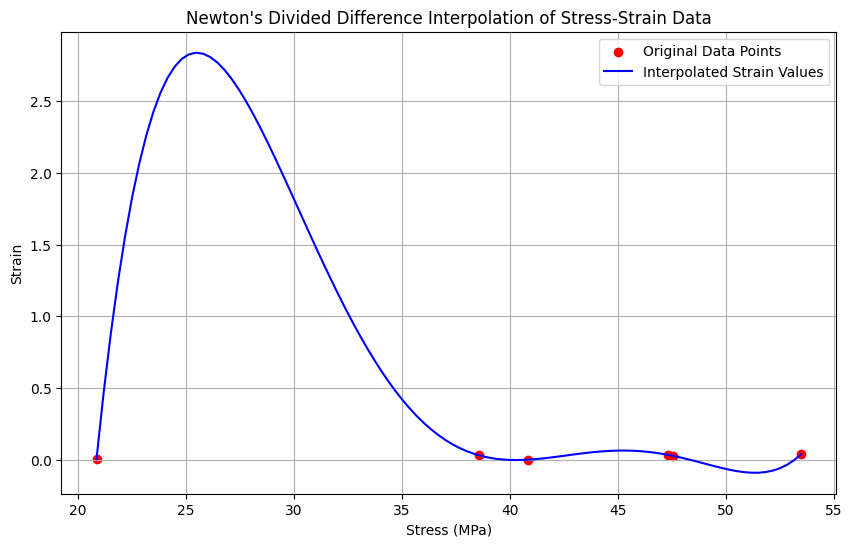

In [126]:
from scipy.interpolate import KroghInterpolator

# Selecting a representative subset of data for the demonstration
subset_eng_data = eng_data.sample(n=6, random_state=1).sort_values(by='Stress_MPa')

# Extracting stress (x) and strain (y) values from the subset
x_stress = subset_eng_data['Stress_MPa'].values
y_strain = subset_eng_data['Strain'].values

# Performing Newton's Divided Difference Interpolation using KroghInterpolator, which implements a similar approach
newton_interpolator = KroghInterpolator(x_stress, y_strain)

# Generating stress values for interpolation
x_stress_interp = np.linspace(x_stress.min(), x_stress.max(), 100)

# Evaluating the interpolator at the stress values
y_strain_interp = newton_interpolator(x_stress_interp)

# Plotting the original data points and the interpolated strain values
plt.figure(figsize=(10, 6))
plt.scatter(x_stress, y_strain, color='red', label='Original Data Points')
plt.plot(x_stress_interp, y_strain_interp, color='blue', label='Interpolated Strain Values')
plt.xlabel('Stress (MPa)')
plt.ylabel('Strain')
plt.title('Newton\'s Divided Difference Interpolation of Stress-Strain Data')
plt.legend()
plt.grid(True)
plt.show()


The plot above illustrates Newton's Divided Difference Interpolation applied to the stress-strain data of a material. The red dots represent the original data points selected for the interpolation, and the blue line shows the interpolated strain values across the range of stress levels.

This interpolation helps model the material's behavior under different stress conditions, providing a continuous representation of the stress-strain relationship. Such models are crucial in materials science for predicting how materials will deform under various loads, which is essential for design and safety assessments in engineering applications.

### Problem 5:

In [127]:
# load the dataset
sports_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/sports_performance.csv')

# viewing the dataset
sports_data

,Athlete,Speed_km_h,Distance_km
0,Athlete_1,23.187664,23.985742
1,Athlete_2,26.919703,29.665108
2,Athlete_3,25.543832,8.918614
3,Athlete_4,23.889506,9.843113
4,Athlete_5,29.251325,16.913282
5,Athlete_6,28.416700,29.477880
6,Athlete_7,23.573976,36.320730
7,Athlete_8,20.435915,25.470522
8,Athlete_9,23.047681,36.614742
9,Athlete_10,23.981857,19.238999


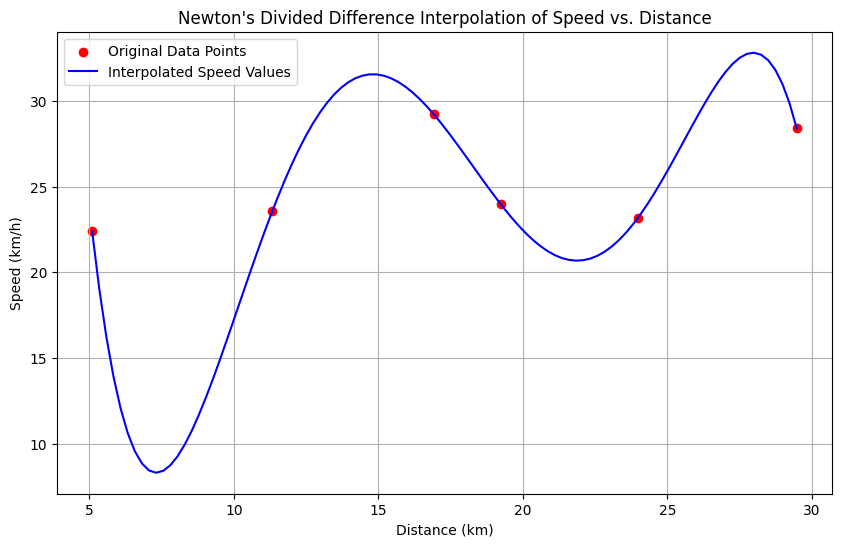

In [128]:
# Selecting a representative subset of data for the demonstration
subset_sports_data = sports_data.sample(n=6, random_state=2).sort_values(by='Distance_km')

# Extracting distance (x) and speed (y) values from the subset
x_distance = subset_sports_data['Distance_km'].values
y_speed = subset_sports_data['Speed_km_h'].values

# Performing Newton's Divided Difference Interpolation for speed based on distance
newton_interpolator_sports = KroghInterpolator(x_distance, y_speed)

# Generating distance values for interpolation
x_distance_interp = np.linspace(x_distance.min(), x_distance.max(), 100)

# Evaluating the interpolator at the distance values for speed
y_speed_interp = newton_interpolator_sports(x_distance_interp)

# Plotting the original data points and the interpolated speed values
plt.figure(figsize=(10, 6))
plt.scatter(x_distance, y_speed, color='red', label='Original Data Points')
plt.plot(x_distance_interp, y_speed_interp, color='blue', label='Interpolated Speed Values')
plt.xlabel('Distance (km)')
plt.ylabel('Speed (km/h)')
plt.title('Newton\'s Divided Difference Interpolation of Speed vs. Distance')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the results of applying Newton's Divided Difference Interpolation to interpolate Speed_km_h based on Distance_km for a subset of athletes. The original data points are marked in red, illustrating the recorded speeds and distances. The blue line represents interpolated speed values across the range of distances, offering insight into how speed might vary with distance for these athletes.

This analysis can be particularly useful in sports performance studies, helping coaches and athletes understand speed endurance over varying distances and potentially identifying optimal distances for peak performance. The flexibility of Newton's method allows for easy updates to the model as new performance data becomes available, making it a valuable tool for ongoing performance analysis.

# Chebyshev Distance


In [129]:
# load the dataset
chebyshev_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/chebyshev_data.csv')

# viewing the dataset
chebyshev_data

,x,y
0,-0.636350,-0.633191
1,-0.391516,0.049513
2,-0.136110,-0.417542
3,0.223706,-0.721012
4,-0.415711,-0.267276
5,-0.087860,0.570352
6,-0.600652,0.028469
7,0.184829,-0.907099
8,0.215090,-0.658952
9,-0.869897,0.897771


Given the typical usage of Chebyshev Distance, we might assume each row represents a point in a 2-dimensional space, and we're to calculate the Chebyshev Distance between corresponding points in two datasets. Alternatively, if x and y are meant to be two distinct sets of points (e.g., x for one set and y for another), we could calculate the Chebyshev Distance across these two sets as a whole.

Assuming the latter (calculating between x and y as two sets), let's proceed with calculating the Chebyshev Distance. If this assumption doesn't match your intent, please clarify how the sets are defined within the data.

Chebyshev Distance between two points in an n-dimensional space is defined as the maximum absolute difference along any coordinate dimension. For points P and Q with coordiantes P = (p1,p2,p3,..,pn) and Q = (q1,q2,q3,...,qn) the chebyshev distance is calculated as Distance Chebyshev (P,Q) = maxi |pi - qi|

In [130]:
# Calculate the Chebyshev Distance between the x and y sets
chebyshev_distance = np.max(np.abs(chebyshev_data['x'] - chebyshev_data['y']))

chebyshev_distance


1.7676678885361075

The Chebyshev Distance between the two sets of points, as defined by the x and y columns in the dataset, is approximately 1.768.

### Significance of Chebyshev Distance:

Chebyshev Distance is significant in approximation and interpolation for several reasons:

Robustness: It measures the maximum difference along any one dimension between two points, making it less sensitive to small variations in multiple dimensions. This can be particularly useful in approximation problems where the worst-case scenario (maximum error) is more critical than the average error.

Grid Movements: In optimization and pathfinding algorithms (like in chess, where the king moves in any direction but only one square at a time), Chebyshev Distance can provide a more accurate heuristic than Euclidean distance because it reflects the actual number of steps needed.

Uniform Scaling: Chebyshev Distance treats all dimensions equally, emphasizing the most significant difference. This is useful in multi-dimensional interpolation and approximation, where one wants to ensure uniform accuracy across all dimensions.

### Comparison to Euclidean Distance:

Euclidean Distance measures the shortest path between two points in space and is defined as the square root of the sum of the squares of the differences between corresponding coordinates. It's like the distance one would measure with a ruler in a straight line.

Chebyshev Distance, on the other hand, considers only the maximum difference among all dimensions. It's akin to moving in a grid where diagonal steps are allowed and counted as a single step.

Euclidean Distance is more intuitive and widely used in various fields, including machine learning, for its geometric interpretation. However, Chebyshev Distance offers advantages in specific scenarios, particularly in optimizations, approximations, and scenarios where the maximum deviation is more significant than the mean deviation.

# Cubic Splines

In [131]:
# loading the dataset
cubic_splines_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Mathematical Modeling/Datasets/cubic_splines_data.csv')

# viewing the dataset
cubic_splines_data

,x,y
0,-3.000000,-1.050056
1,-2.877551,-0.994512
2,-2.755102,-0.986408
3,-2.632653,-0.688034
4,-2.510204,-0.808558
5,-2.387755,-0.834839
6,-2.265306,-0.557754
7,-2.142857,-0.663450
8,-2.020408,-0.413730
9,-1.897959,-0.517325


Cubic Splines interpolation involves fitting piecewise cubic polynomials between consecutive data points, ensuring smoothness by matching the first and second derivatives at the endpoints of the polynomials.

To fit a Cubic Spline through these data points, we'll use a spline fitting function that allows for some control over the spline's smoothness. This control is often achieved by adjusting parameters that affect the spline's flexibility and how closely it fits the data points.

After fitting the spline, we'll evaluate the curve's smoothness and discuss the trade-offs between smoothness and fitting accuracy.

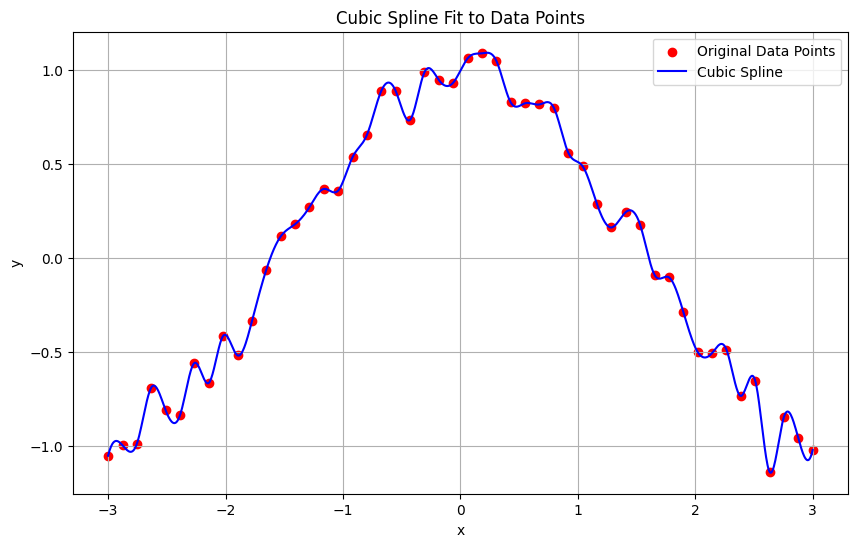

In [132]:
from scipy.interpolate import CubicSpline, make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

# Sorting the data by x to ensure the spline is properly fitted
splines_data_sorted = cubic_splines_data.sort_values(by='x')

# Extracting x and y values
x_values = splines_data_sorted['x'].values
y_values = splines_data_sorted['y'].values

# Fitting a Cubic Spline with a default smoothing factor
cs = make_interp_spline(x_values, y_values)

# Generating x values for plotting the spline
x_plot = np.linspace(x_values.min(), x_values.max(), 1000)

# Evaluating the spline at the plotting points
y_spline = cs(x_plot)

# Plotting the original data points and the fitted spline
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='red', label='Original Data Points')
plt.plot(x_plot, y_spline, color='blue', label='Cubic Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Fit to Data Points')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the Cubic Spline fit to the original data points. The red dots represent the provided data points, and the blue line is the Cubic Spline curve that smoothly interpolates between these points.

### Trade-offs Between Curve Smoothness and Fitting Accuracy

When fitting a curve to data points using Cubic Splines, there are key trade-offs to consider between the smoothness of the curve and how accurately it fits the data points:

Curve Smoothness: A smoother curve may be more aesthetically pleasing and may better represent the underlying trend if the data contains noise. However, overly smoothing the curve may lead to underfitting, where the curve fails to capture significant variations in the data.

Fitting Accuracy: A curve that closely follows every data point may accurately represent the dataset but can lead to overfitting, especially if the data contains outliers or noise. This overfitting can make the curve less generalizable to new data points or underlying trends.

Adjusting the spline parameters, particularly the smoothing factor, allows control over this trade-off:

A higher smoothing factor makes the spline smoother but less responsive to the data points, potentially ignoring important variations.

A lower smoothing factor allows the spline to more closely fit the data points, increasing the risk of capturing noise as if it were a meaningful trend.

The choice of smoothing factor (or the decision to use a smoothing spline versus an interpolating spline) depends on the nature of the data and the specific goals of the analysis. For example, if the data is known to contain a significant amount of noise, a higher smoothing factor may be preferable. Conversely, if capturing precise details is crucial, a lower smoothing factor might be more appropriate.



We are going to look into further potential smoothing factors.

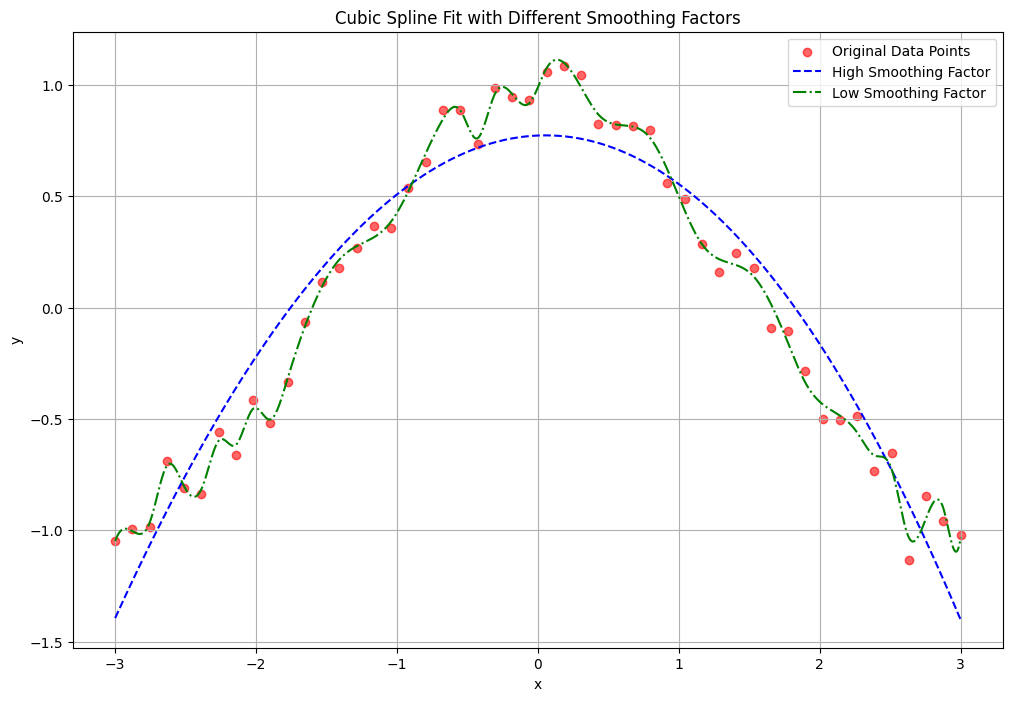

In [133]:
from scipy.interpolate import UnivariateSpline

# Fitting Cubic Splines with different smoothing factors
# High smoothing factor
spline_high_smoothing = UnivariateSpline(x_values, y_values, s=10)

# Low smoothing factor
spline_low_smoothing = UnivariateSpline(x_values, y_values, s=0.1)

# Evaluating the splines at the plotting points
y_spline_high = spline_high_smoothing(x_plot)
y_spline_low = spline_low_smoothing(x_plot)

# Plotting the original data points and the fitted splines with different smoothing factors
plt.figure(figsize=(12, 8))
plt.scatter(x_values, y_values, color='red', label='Original Data Points', alpha=0.6)
plt.plot(x_plot, y_spline_high, label='High Smoothing Factor', color='blue', linestyle='--')
plt.plot(x_plot, y_spline_low, label='Low Smoothing Factor', color='green', linestyle='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Fit with Different Smoothing Factors')
plt.legend()
plt.grid(True)
plt.show()


### Observations and Trade-offs:

High Smoothing Factor: Results in a smoother curve that may be preferred when the goal is to identify the overall trend or when the data contains noise. However, this generalization might overlook important subtleties in the data, potentially underfitting areas with significant local variations.

Low Smoothing Factor: Provides a curve that captures more of the data's intricacies, which could be crucial for accurately representing the dataset's behavior. Yet, this approach risks overfitting to noise or outliers, possibly misrepresenting the underlying phenomenon by emphasizing random variations as if they were significant patterns.

Choosing the appropriate smoothing level depends on the context of the analysis, the nature of the data, and the specific objectives of the modeling effort. A balance must be struck between achieving a smooth, generalizable curve and accurately fitting the data's details.



# Conclusion

### Newton's Divided Difference and Lagrange Interpolation

We began by applying Newton's Divided Difference and Lagrange Interpolation methods to interpolate missing values in datasets representing environmental measurements and material stress-strain data. Newton's method was highlighted for its efficiency in adding new data points without recalculating the entire polynomial, making it suitable for dynamic datasets. In contrast, Lagrange Interpolation was noted for its simplicity and direct applicability to static datasets. These methods are crucial for filling gaps in data, allowing for more comprehensive analysis and decision-making in environmental science and materials engineering.

### Chebyshev Distance

We calculated the Chebyshev Distance between two sets of points and discussed its significance in approximation theory. The Chebyshev Distance, emphasizing the maximum deviation among dimensions, is particularly valuable in scenarios where the worst-case performance is critical. This distance metric is applicable in optimization problems, grid movements in algorithms, and ensuring uniform accuracy across multi-dimensional interpolations and approximations.

### Cubic Splines

We explored Cubic Splines for fitting smooth curves through a set of data points, adjusting spline parameters to examine the trade-offs between curve smoothness and fitting accuracy. Cubic Splines, with their flexibility in fitting data while ensuring continuity and smoothness, are indispensable for creating models that reflect underlying trends without overfitting noise. They find applications in fields requiring smooth transitions, such as computer graphics, animation, and the modeling of natural phenomena.

### Key Insights and Applications

Across these techniques, a recurring theme was the importance of understanding the data's nature and the analysis's objectives to choose the most appropriate method. For instance, the decision between Newton's and Lagrange's methods hinges on the dataset's dynamism, while the choice of smoothing factor in spline fitting balances between capturing detail and avoiding overfitting.

These methods collectively offer powerful tools for tackling real-world problems across various disciplines. From environmental studies, where interpolating missing measurements can lead to better ecosystem management, to materials science, where understanding stress-strain relationships is crucial for designing safer materials, and to sports science, where performance analysis informs training strategies.

### Overall 

This exploration underscores the versatility and nuanced application of interpolation and approximation techniques in mathematical modeling. By carefully selecting and applying these methods, we can extract meaningful insights from incomplete data, model complex relationships, and make informed decisions across a wide range of scientific and engineering fields. The key lies in balancing accuracy, smoothness, and the computational efficiency of these models to suit specific analytical goals and data characteristics.